# Inicio

In [43]:
# Bibliotecas fundamentais
import numpy as np
import pandas as pd

# Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações e importações gerais
from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
sns.set_theme(palette="bright")

In [44]:
df = pd.read_csv(DADOS_ORIGINAIS)

with pd.option_context("display.max_columns", 35):
    display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Exploração Básica

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [46]:
# col_num = [c for c in df.columns if c in df.select_dtypes(include='number')]
# col_obj = [c for c in df.columns if c in df.select_dtypes(exclude='number')]


# df_types = pd.DataFrame({
#     'Tipo de Coluna': ['Numérico', 'Object'],
#     'Nomes das Colunas': [col_num, col_obj],
# }).explode(column='Nomes das Colunas').reset_index(drop=True).set_index(keys='Nomes das Colunas')

# print(df_types.value_counts(), "\n\n" , 
#       "total de colunas", len(df_types.values))

In [47]:
# df_types[df_types['Tipo de Coluna'] == 'Numérico']

In [48]:
# df_types[df_types['Tipo de Coluna'] == 'Object']

In [49]:
with pd.option_context("display.max_columns", 35,
                       'float_format' , "{:.2f}".format):
    
    display(df.describe())

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [50]:
df.describe(exclude='number')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


Veja, podem existir colunas com apenas 1 valor único, como a `Over18`. Excluir elas pode ser útil, pois não agregam informação.

In [51]:
cols_unicas = df.nunique()[df.nunique() == 1]
cols_unicas

EmployeeCount    1
Over18           1
StandardHours    1
dtype: int64

In [52]:
df = df.drop(columns=cols_unicas.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Nesse contexto, a coluna `EmployeeNumber` certamente é uma coluna de identificação e pode ser descartada

In [53]:
df['EmployeeNumber'].nunique()

1470

In [54]:
df = df.drop(columns="EmployeeNumber")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Existe desbalanceamento?

In [55]:
df['Attrition'].value_counts(normalize=True)

Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64

Vimos que não existem valores nulos (número de entrada = número de não nulos por colunas), mas podemos verificar de forma analítica:

In [56]:
df.loc[:, df.isnull().sum() > 0].shape

(1470, 0)

Pode ser útil verficar duplicados

In [57]:
df.duplicated().sum()

np.int64(0)

# Exploração guiada

In [58]:
colunas_categoricas_nao_ordenadas = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime",
]

colunas_categoricas_ordenadas = [
    "Education",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "JobInvolvement",
    "JobLevel",
    "PerformanceRating",
    "RelationshipSatisfaction",
    "StockOptionLevel",
    "WorkLifeBalance",
]

coluna_alvo = ['Attrition']

colunas_numericas = [c for c in df.columns 
                     if c not in coluna_alvo + colunas_categoricas_nao_ordenadas + colunas_categoricas_ordenadas]

In [59]:
len(colunas_numericas)

14

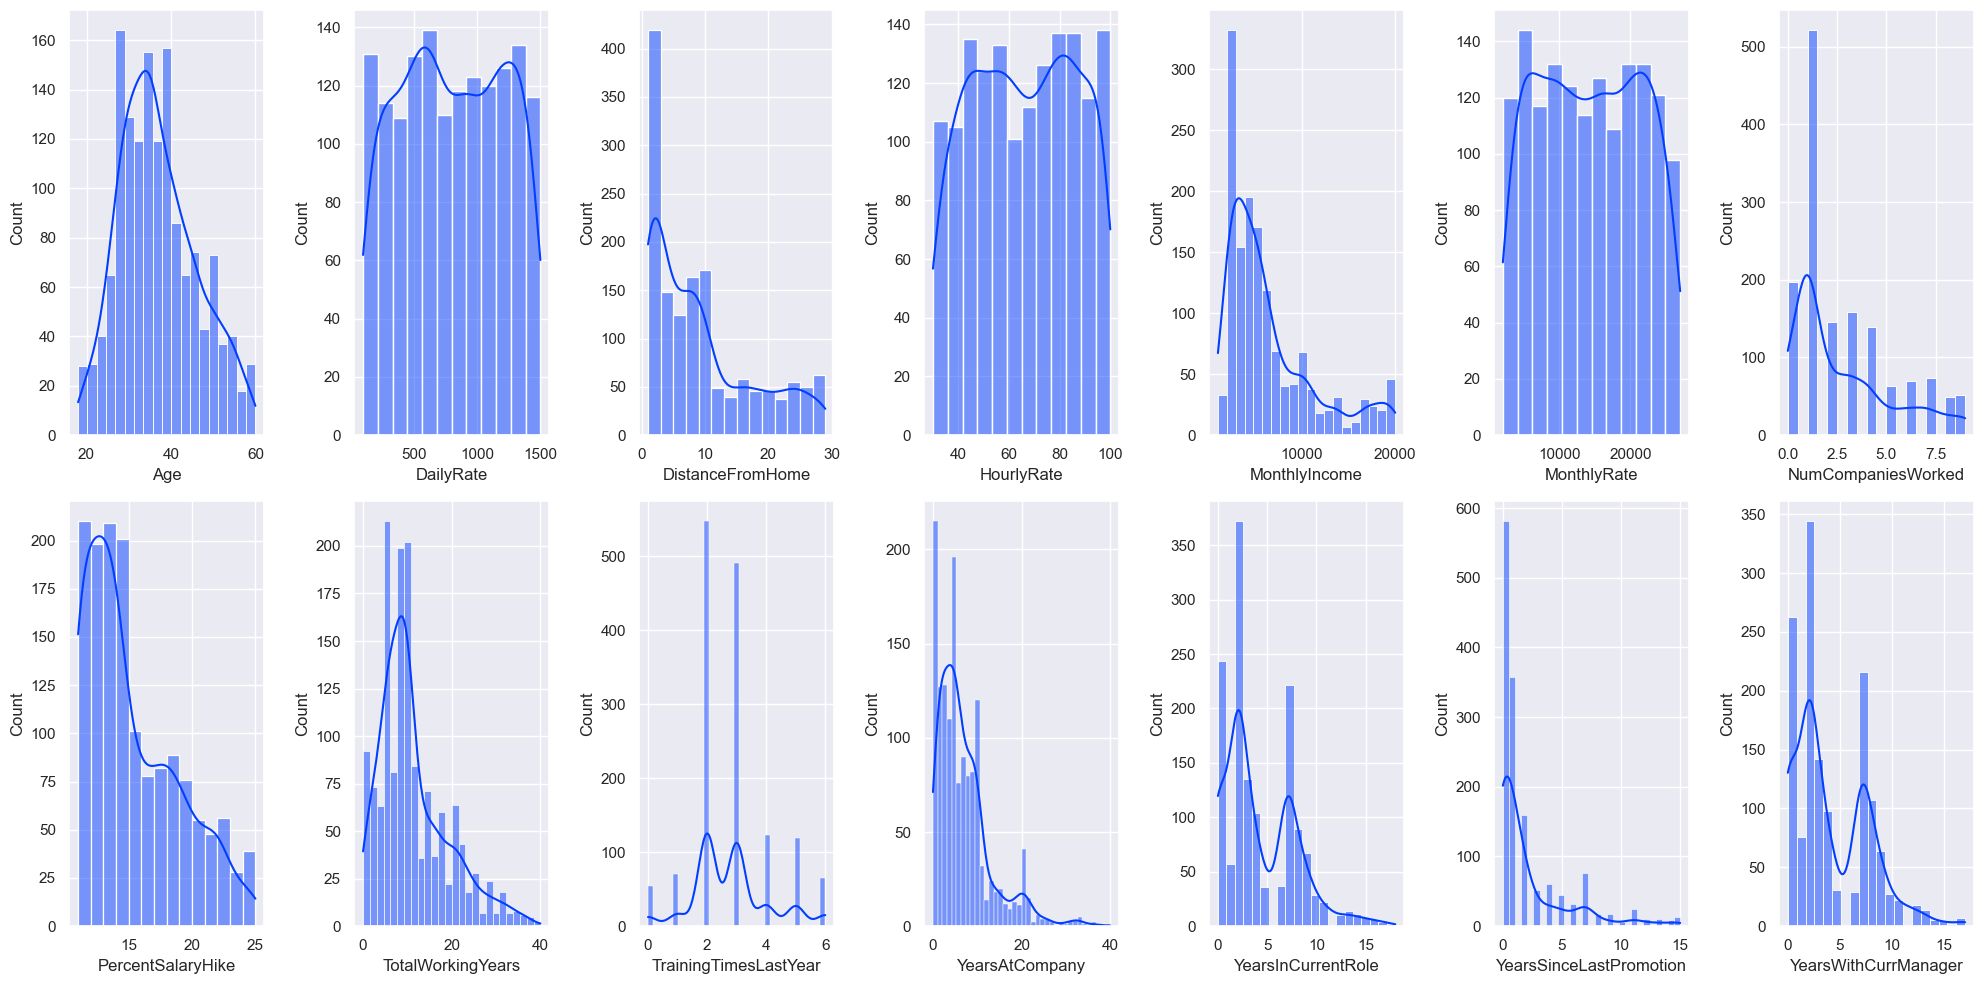

In [60]:
fig, axs = plt.subplots(ncols=7, nrows=2,
                       figsize=(20, 10))

for c, ax in zip(colunas_numericas, axs.flatten()):
    sns.histplot(
        data=df, x=c,
        ax=ax,
        kde=True
    )


plt.tight_layout()
plt.show()

In [ ]:
df[colunas_numericas].skew()

Age                        0.413286
DailyRate                 -0.003519
DistanceFromHome           0.958118
HourlyRate                -0.032311
MonthlyIncome              1.369817
MonthlyRate                0.018578
NumCompaniesWorked         1.026471
PercentSalaryHike          0.821128
TotalWorkingYears          1.117172
TrainingTimesLastYear      0.553124
YearsAtCompany             1.764529
YearsInCurrentRole         0.917363
YearsSinceLastPromotion    1.984290
YearsWithCurrManager       0.833451
dtype: float64

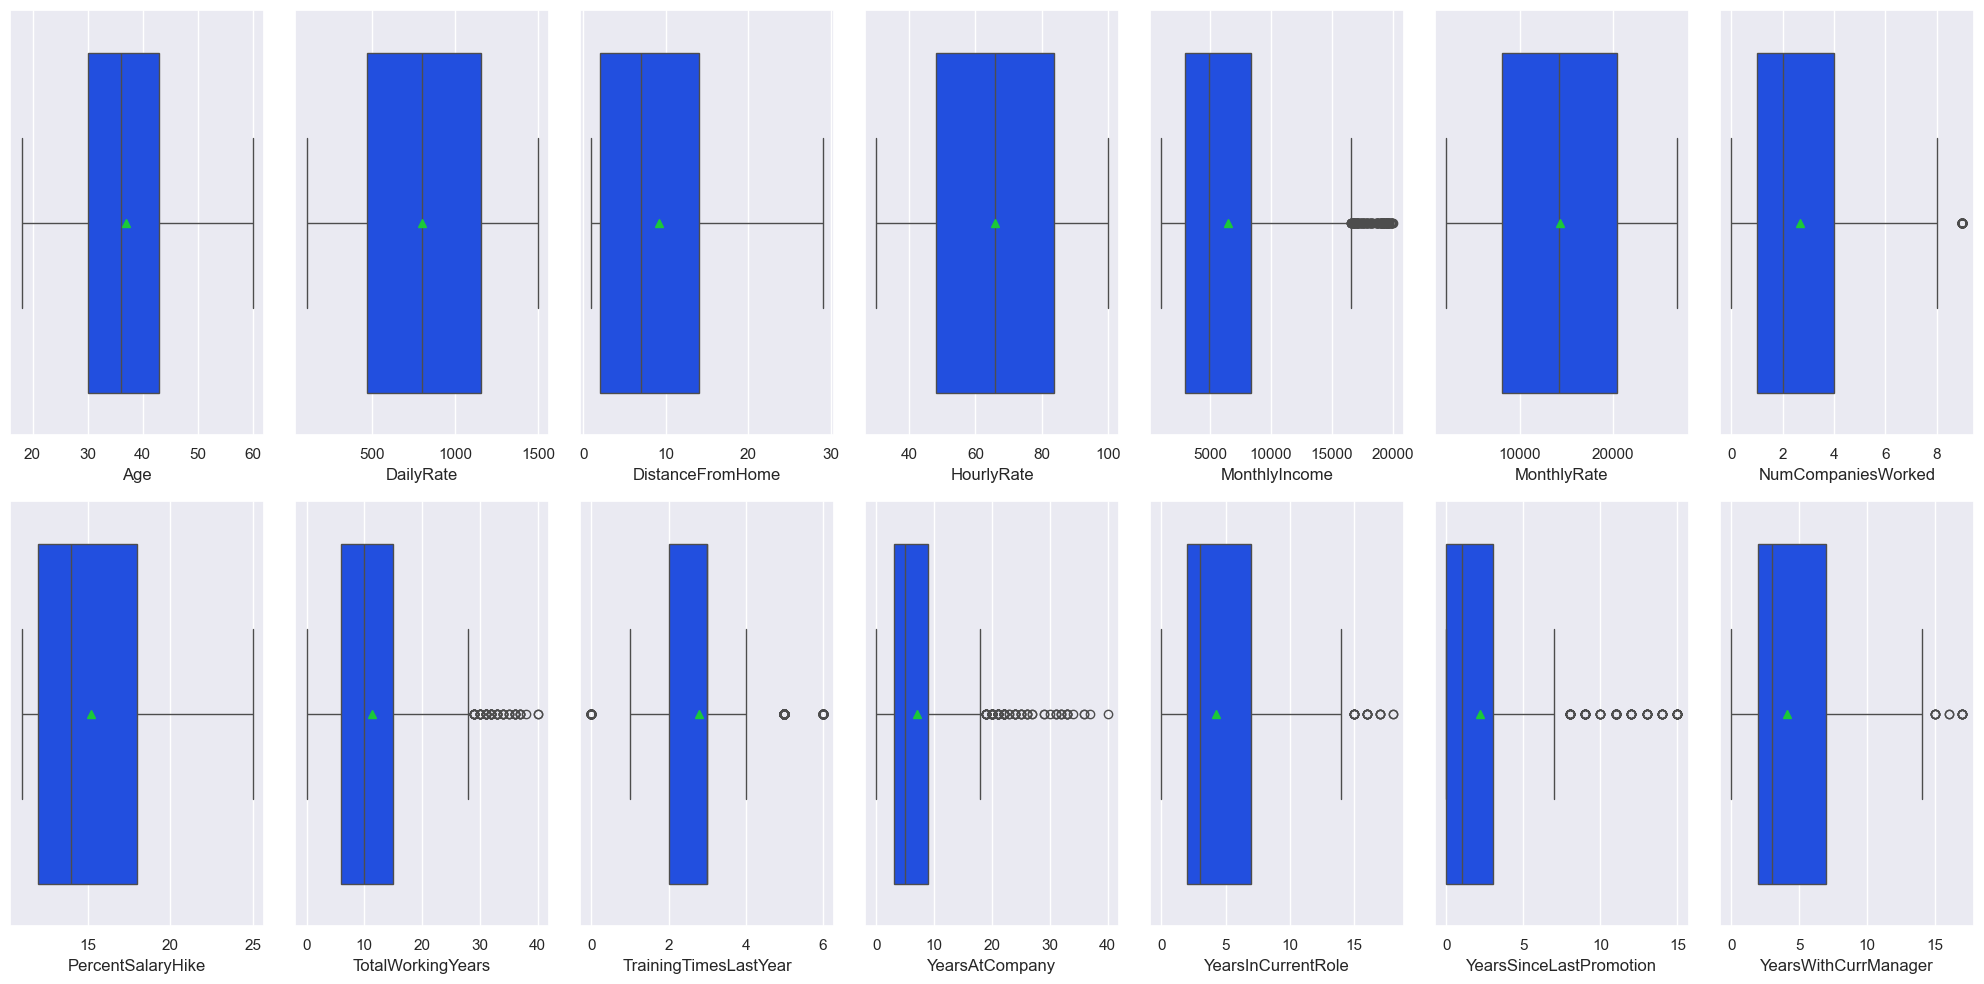

In [61]:
fig, axs = plt.subplots(ncols=7, nrows=2,
                       figsize=(20, 10))

for c, ax in zip(colunas_numericas, axs.flatten()):
    sns.boxplot(
        data=df, x=c,
        ax=ax,
        showmeans=True
    )


plt.tight_layout()
plt.show()

- Empresa de Jovens?

Com o `histograma` e o `boxplot` fica clara a assimetrica de algumas colunas, como `DistanceFromHome`, `MonthlyIncome` e `YearsInCurrentRole`; com os valores de assimetria (skew) temos um suporte analítico mais forte para essa afirmação (>0 assimetria à esqueda, ou calda na direita). Isso pode indicar alguma característica importante e essa colunas pondem dar informações sobre o perfil do colaborador, como, por exemplo, um perfil jovem em geral e jovem na empresa, que é suportado pelo formato de distribuição em `Age` e `YearsInCompany` (também em acordo com as citadas acima)

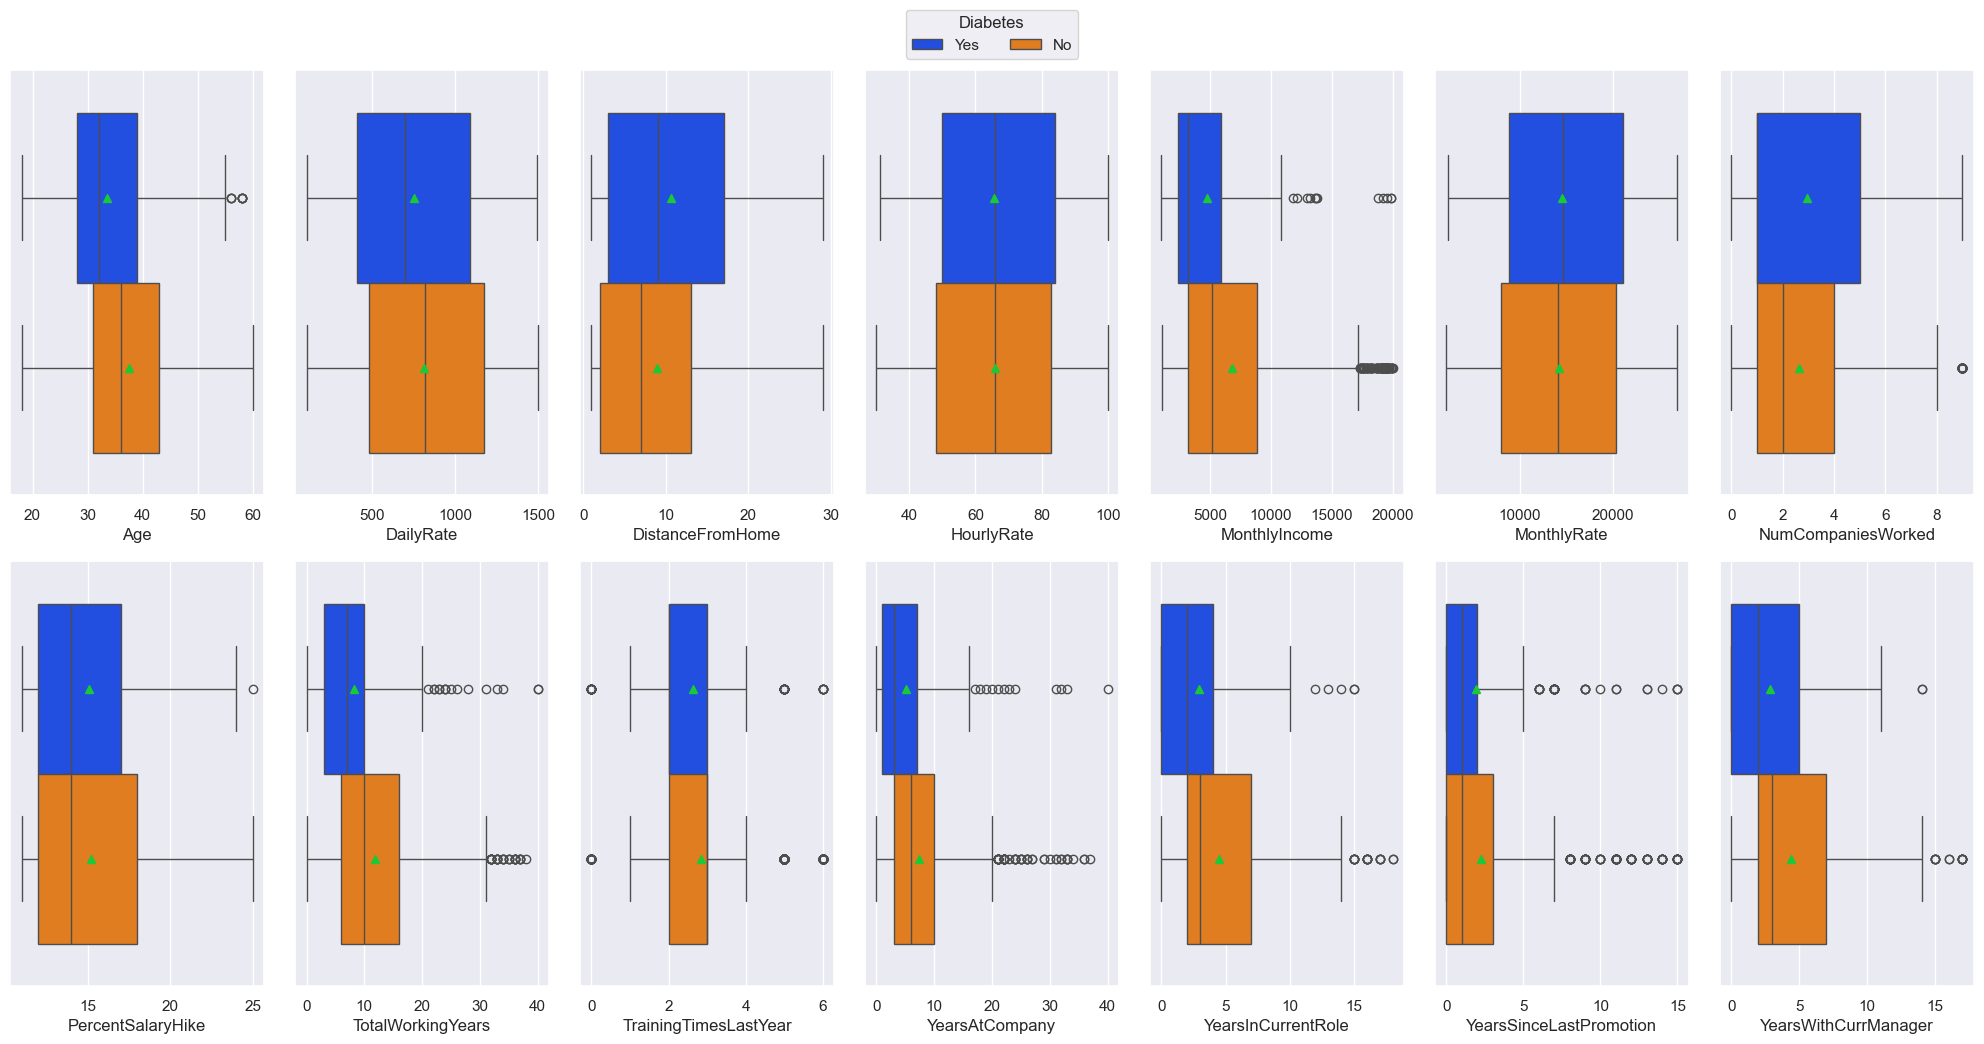

In [62]:
fig, axs = plt.subplots(ncols=7, nrows=2,
                       figsize=(20, 10))

for c, ax in zip(colunas_numericas, axs.flatten()):
    b = sns.boxplot(
        data=df, x=c,
        ax=ax,
        showmeans=True,
        hue="Attrition"
    )
    legend = b.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Diabetes', bbox_to_anchor=(0.5, 1.05))


plt.tight_layout()
plt.show()

- Por que saem?

De forma geral, as colunas numériacs _per se_ parecem indicar pouca separação na variável alvo. É possível ainda assim notar, mas nada que salte aos olhos.

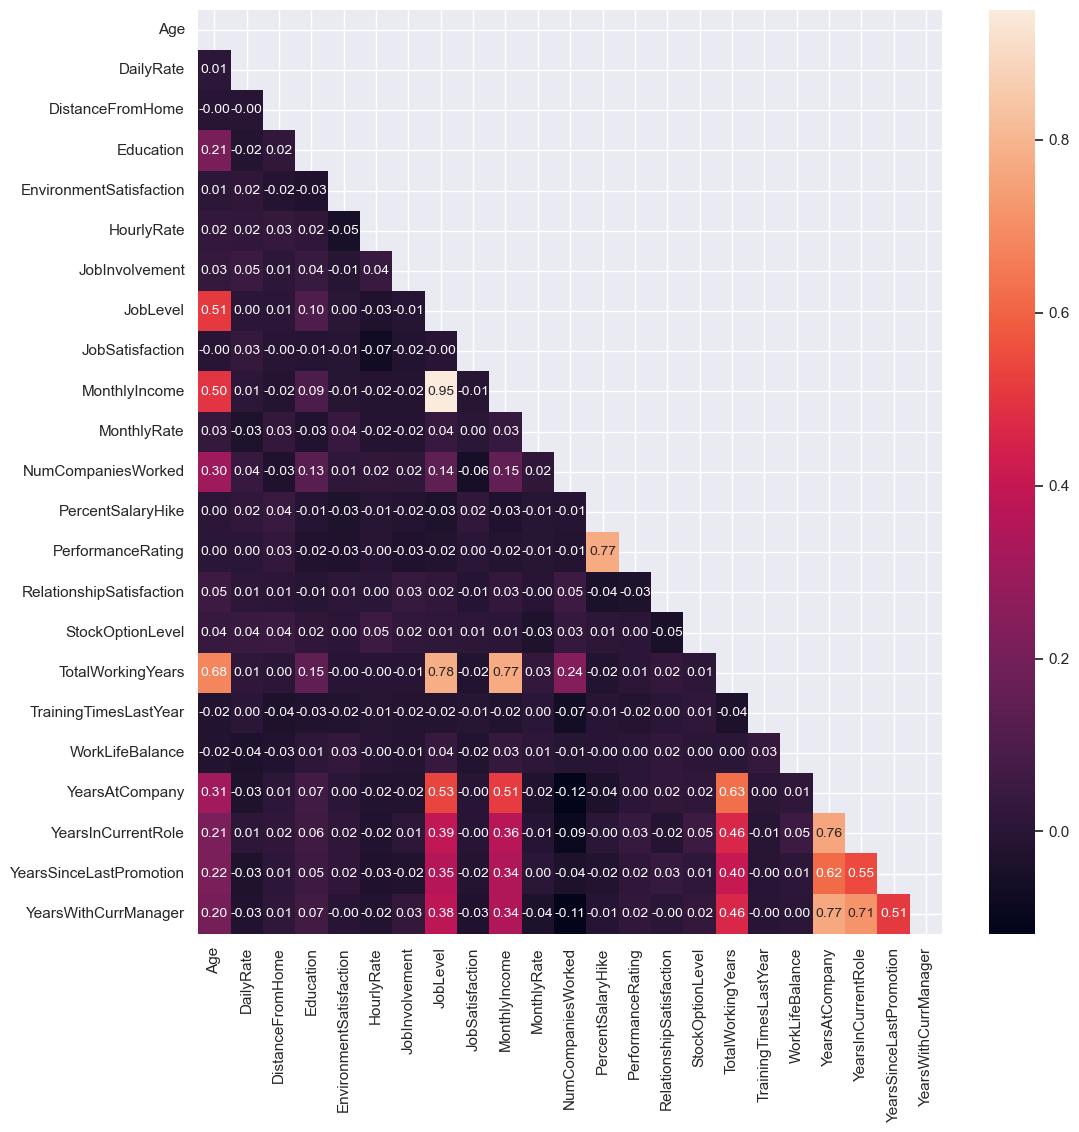

In [63]:
df_corr = df.select_dtypes(include="number").corr() # Usar a lista de colunas numéricas limitaria a análise de todas as demais do tipo numérico (categórias  excluídas)
mask = np.triu(df_corr)

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(
    data=df_corr,
    mask=mask, 
    annot=True, fmt='.2f' ,
    ax=ax,
    annot_kws={"fontsize" : 10}
)

plt.show()

- Idade importa!

É bem clara as correlações entre as colunas de idade (três últimas colunas do gráfico) entre si e com deamais colunas como `Age`, `MonthlyIncome` e `TotalWorkingYears`. Isso demonstra certa coerência nos dados, pois se espera esse tipo de correlação.

- Salário Importa

Se espera também correlações fortes entre colunas de salário e cargo e tempo na empresa, como se vê em `MonthlyIncome` e `JobLevel`.


In [64]:
# Otimizando tipos

col_tipo_num = [c for c in df.select_dtypes(include="int")]
col_tipo_num

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [65]:
df[col_tipo_num] = df[col_tipo_num].apply(
    pd.to_numeric, downcast="integer"
)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int8  
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int16 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int8  
 6   Education                 1470 non-null   int8  
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int8  
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int8  
 11  JobInvolvement            1470 non-null   int8  
 12  JobLevel                  1470 non-null   int8  
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [66]:
df.to_parquet(DADOS_TRATADOS, index=False)